In [121]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [67]:
huc10 = gpd.read_file('../data/huc10.geojson')

In [3]:
huc10.head()

,huc2,tnmid,metasource,sourcedata,sourceorig,sourcefeat,loaddate,referenceg,areaacres,areasqkm,...,humod,shape_Leng,shape_Area,ObjectID,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,09,{7920C658-F284-420B-9DDB-AF698DB7638D},{4C5B3544-0506-4F68-9052-0EA609999DCC},NaN,NaN,NaN,2017-03-11,NaN,83178.31,336.61,...,NaN,NaN,NaN,34,0400000US04,04,Arizona,,113594.084,"POLYGON ((-113.47990 48.74996, -113.47581 48.7..."
1,09,{77EF4627-18F4-4B8B-A662-5A0EAECCBF20},{4C5B3544-0506-4F68-9052-0EA609999DCC},NaN,NaN,NaN,2017-03-11,NaN,64585.33,261.37,...,NaN,NaN,NaN,35,0400000US04,04,Arizona,,113594.084,"POLYGON ((-113.70865 48.85038, -113.70738 48.8..."
2,09,{F0499B78-C0AF-4552-8BA4-DFB2F061BC3A},{4C5B3544-0506-4F68-9052-0EA609999DCC},NaN,NaN,NaN,2017-03-11,NaN,67739.49,274.13,...,NaN,NaN,NaN,36,0400000US04,04,Arizona,,113594.084,"POLYGON ((-113.65068 48.99772, -113.65065 48.9..."
3,09,{8408FE47-5F2E-44C2-8A32-1C1B99FF5FD4},{4C5B3544-0506-4F68-9052-0EA609999DCC},NaN,NaN,NaN,2017-03-11,NaN,43192.75,174.80,...,NaN,NaN,NaN,37,0400000US04,04,Arizona,,113594.084,"POLYGON ((-113.33785 48.99827, -113.33780 48.9..."
4,09,{4B09C9D6-5A1F-4823-8F13-EB717D93C8E1},{4C5B3544-0506-4F68-9052-0EA609999DCC},NaN,NaN,NaN,2017-03-11,NaN,57367.75,232.16,...,NaN,NaN,NaN,38,0400000US04,04,Arizona,,113594.084,"POLYGON ((-113.24468 48.99830, -113.24468 48.9..."


In [4]:
huc10.columns

Index(['huc2', 'tnmid', 'metasource', 'sourcedata', 'sourceorig', 'sourcefeat',
       'loaddate', 'referenceg', 'areaacres', 'areasqkm', 'states', 'huc10',
       'name', 'hutype', 'humod', 'shape_Leng', 'shape_Area', 'ObjectID',
       'GEO_ID', 'STATE', 'NAME', 'LSAD', 'CENSUSAREA', 'geometry'],
      dtype='object')

In [36]:
huc10_sim = huc10.drop(columns=['tnmid','metasource', 'sourcedata', 'sourceorig', 'sourcefeat',
       'loaddate', 'referenceg','hutype', 'humod', 'shape_Leng', 'shape_Area', 'ObjectID',
       'GEO_ID', 'STATE', 'NAME', 'LSAD', 'CENSUSAREA'])

In [57]:
len(huc10_sim['huc10'].unique())

6072

In [50]:
huc2 = huc10_sim.dissolve(by='huc2',aggfunc='sum')

<Axes: >

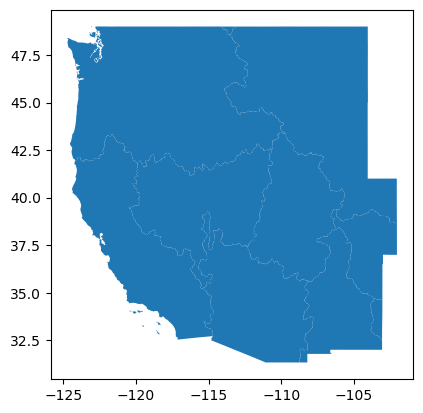

In [117]:
huc2.plot()

<Axes: >

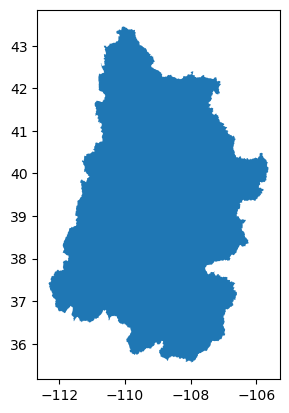

In [130]:
huc2[5:6].plot()

In [132]:
huc2

,geometry,areaacres,areasqkm,states,huc10,name
huc2,,,,,,
09,"POLYGON ((-113.46394 48.61630, -113.46407 48.6...",7.368587e+05,2981.97,"MTMTCN,MTCN,MTCN,MTCN,MTCN,MTMTCN,MT",0904000101090400010209040002010904000103090400...,Headwaters Saint Mary RiverSwiftcurrent CreekH...
10,"POLYGON ((-111.87005 44.56395, -111.87022 44.5...",1.521878e+08,615882.85,MTCOCOCOCOCOCOMTMTMTCOMTMTMTMTMTMTMTMTMTMTMTMT...,1004020102101900030910190003101019000311101900...,South Fork Musselshell RiverLost CreekSanborn ...
11,"POLYGON ((-104.67753 35.22997, -104.67807 35.2...",3.276798e+07,132607.43,"NM,TXNM,TXNM,TXCO,NMCO,NMNM,OKNM,TXCO,NM,OKCO,...",1112010103110901010311120101021104000103110800...,Frio DrawArroyo TrujilloOutlet Tierra Blanca C...
12,"POLYGON ((-103.06480 32.69076, -103.06486 32.6...",5.459801e+06,22095.06,"NM,TXNM,TXNM,TXNM,TXNM,TXNM,TXNM,TXNM,TXNM,TXN...",1205000202120500050112080001021208000307120800...,Headwaters Blackwater DrawRunning Water DrawSu...
13,"POLYGON ((-108.75655 31.33269, -108.75660 31.3...",5.691493e+07,230326.85,"MX,NMNM,TXNM,TXNM,TXNM,TXNM,TXMX,NMMX,NMMX,NMM...",1303020109130500040913050004171307000101130700...,Simpson DrawNorth DrawLinda LakeRed Bluff Rese...
14,"POLYGON ((-110.93089 36.58755, -110.93103 36.5...",7.254242e+07,293569.06,"COCOCOWYAZ,NMAZ,NMCO,NMCO,NMCO,NMCO,NMCO,NMCO,...",1401000107140100011014010003021404010108140801...,Muddy CreekRock CreekUpper Eagle RiverMuddy Cr...
15,"POLYGON ((-114.80074 32.49040, -114.81362 32.4...",9.350180e+07,378388.72,"AZAZ,MXAZ,MXAZAZAZAZAZAZAZAZAZAZAZAZAZAZAZNVNV...",1505030203150801030615050301051506010503150601...,Tanque Verde Creek-Rillito RiverTule DesertJos...
16,"POLYGON ((-119.08154 38.21990, -119.08087 38.2...",9.069970e+07,367048.98,"NVNVNVNVNVNVNVNVNVNVCA,NVNVNVNV,UTNV,UTNV,UTNV...",1604010705160401070116040107021604010704160401...,Antelope CreekHeadwaters Reese RiverCottonwood...
17,"MULTIPOLYGON (((-124.42555 42.35187, -124.4240...",1.822409e+08,737503.26,"ORORIDWAORORORORORORORORID,ORIDIDIDIDWAWAWAIDI...",1705010807170703060217040214041706010904170701...,Lower Cow CreekWillow CreekLower Beaver CreekL...


In [120]:
huc2.to_file('../data/huc2.geojson', driver='GeoJSON')

In [134]:
huc2.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [52]:
swe = xr.open_dataset('../data/reanalysis/SWE_reanalysis_32yrs.nc')

In [135]:
swe_ucrb = swe.rio.clip(huc2[5:6].to_crs('epsg:4326').geometry)

In [140]:
swe_ucrb.to_netcdf('../data/swe_reanalysis_ucrb.nc')

<Axes: title={'center': 'Year = 1990, spatial_ref = 0'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>

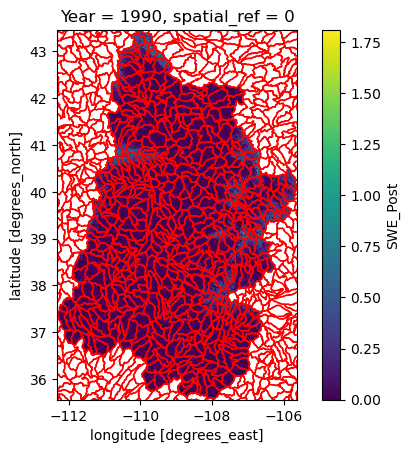

In [139]:
fig, ax = plt.subplots()
swe_ucrb.SWE_Post[0].plot(ax=ax)
huc10_sim_100.plot(ax=ax, facecolor='none',edgecolor='red')

In [54]:
mean_swe = swe.SWE_Post.mean(dim='Year').where(swe.SWE_Post.mean(dim='Year')>0.1)

In [145]:
swe_ucrb_mean = swe_ucrb.SWE_Post.mean(dim='Year').where(swe_ucrb.SWE_Post.mean(dim='Year')>0.1)

In [146]:
swe_ucrb_mean.to_netcdf('../data/mean_swe_reanalysis_ucrb.nc')

In [143]:
swe_ucrb_stdev = swe_ucrb.SWE_Post.std(dim='Year', skipna=True, ddof=1).where(swe_ucrb.SWE_Post.mean(dim='Year')>0.1)

/Users/Hannah/micromamba/envs/analysis_2023/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [144]:
swe_ucrb_stdev.to_netcdf('../data/stdev_swe_reanalysis_ucrb.nc')

In [94]:
swe_stdev = swe.SWE_Post.std(dim='Year', skipna=True, ddof=1).where(swe.SWE_Post.mean(dim='Year')>0.1)

/Users/Hannah/micromamba/envs/analysis_2023/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


<Axes: >

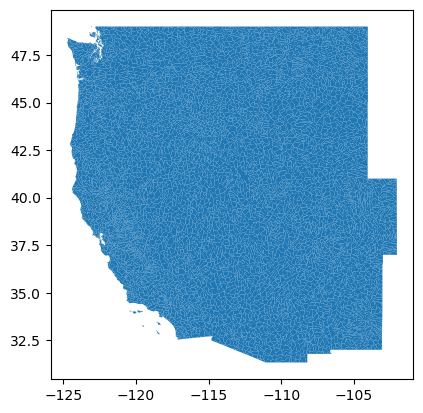

In [40]:
huc10_sim.plot()

In [68]:
huc10.geometry.nbytes

48576

In [64]:
huc10_sim.geometry.nbytes

48576

In [60]:
huc10_sim_proj = huc10_sim.to_crs('epsg:32611')

In [61]:
huc10_sim_proj_10 = huc10_sim_proj.geometry.simplify(tolerance=10)

In [62]:
huc10_sim_proj_10.nbytes

48576

In [69]:
huc10_sim_proj_100 = huc10_sim_proj.copy()

In [70]:
huc10_sim_proj_100.geometry = huc10_sim_proj.geometry.simplify(tolerance=100)

In [71]:
huc10_sim_proj_100.geometry.nbytes

48576

<Axes: >

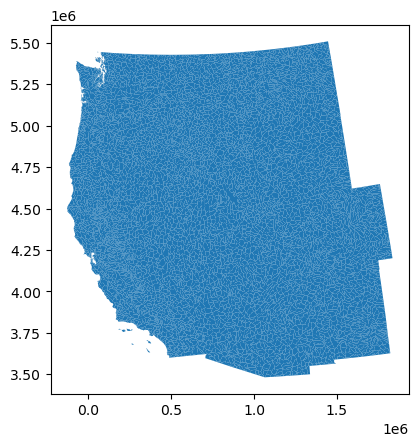

In [73]:
huc10_sim_proj_100.plot()

<Axes: >

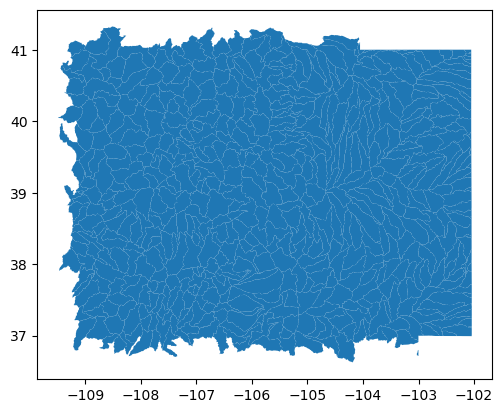

In [46]:
huc10_sim[huc10_sim['states'].str.contains('CO')].plot()

<Axes: >

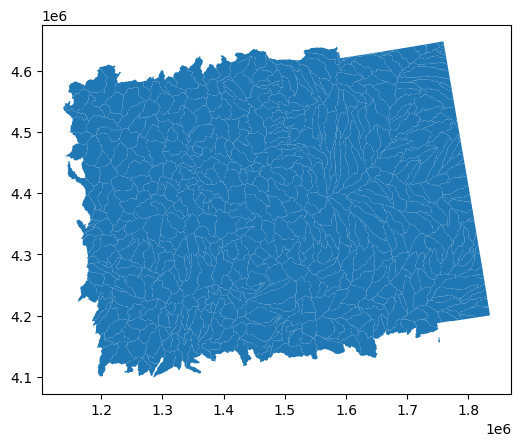

In [74]:
huc10_sim_proj_100[huc10_sim_proj_100['states'].str.contains('CO')].plot()

In [81]:
huc10_sim_proj_1000 = huc10_sim_proj.copy()

In [82]:
huc10_sim_proj_1000.geometry = huc10_sim_proj.geometry.simplify(tolerance=1000)

In [85]:
huc10_sim_proj_1000.to_file('../data/huc10_1000.geojson',driver='GeoJSON')

In [87]:
huc10_sim_proj_100.to_file('../data/huc10_100.geojson',driver='GeoJSON')

<Axes: >

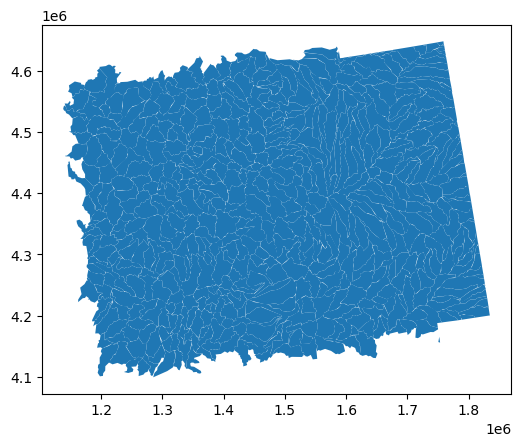

In [83]:
huc10_sim_proj_1000[huc10_sim_proj_1000['states'].str.contains('CO')].plot()

<Axes: title={'center': 'spatial_ref = 0'}, xlabel='x', ylabel='y'>

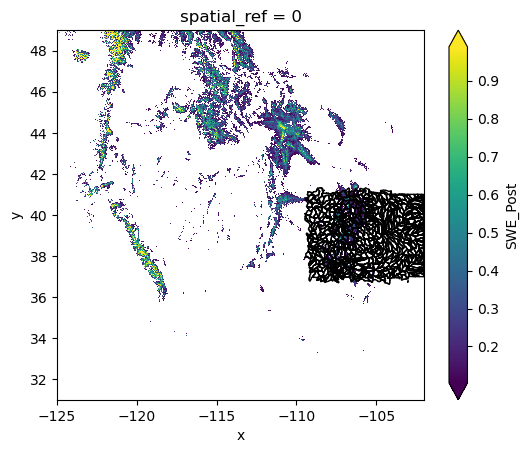

In [96]:
fig, ax = plt.subplots()
mean_swe.plot(ax=ax,robust=True)
huc10_sim_proj_100[huc10_sim_proj_100['states'].str.contains('CO')].to_crs('epsg:4326').plot(ax=ax, facecolor='none', edgecolor='k')

In [97]:
huc10_sim_proj_100[huc10_sim_proj_100['states'].str.contains('CO')].to_crs('epsg:4326').bounds

,minx,miny,maxx,maxy
10,-104.566823,39.667284,-104.255152,40.303306
11,-104.518328,40.239558,-104.169797,40.642670
12,-104.316936,40.036497,-104.077203,40.565907
13,-105.926991,39.591150,-105.643099,39.804822
14,-105.736252,39.600860,-105.379867,39.876245
...,...,...,...,...
2276,-107.874790,40.798440,-107.203390,41.164961
2278,-109.377706,40.351951,-108.974048,40.612724
2280,-109.041130,40.309272,-108.375510,40.610394
2281,-108.455720,40.362742,-107.824360,40.757590


In [104]:
huc10_sim_100 = huc10_sim_proj_100.to_crs('epsg:4326')

In [102]:
clusters = gpd.read_file('../data/cluster_polygons.geojson')

In [84]:
huc10_sim_proj_1000.geometry.nbytes

48576

In [106]:
huc10_snow = huc10_sim_100.overlay(clusters, how='union')

/Users/Hannah/micromamba/envs/analysis_2023/lib/python3.9/site-packages/geopandas/geodataframe.py:2451: UserWarning: `keep_geom_type=True` in overlay resulted in 1388 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  return geopandas.overlay(


In [ ]:
huc10.intersect

<Axes: >

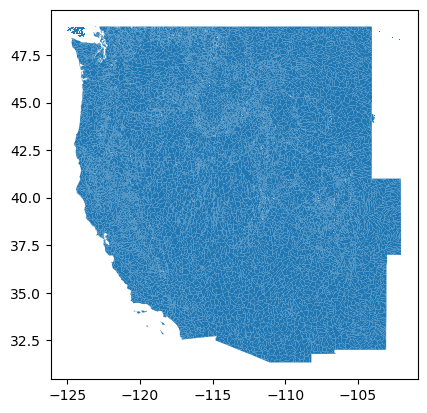

In [107]:
huc10_snow.plot()

In [109]:
huc10_snow

,huc2,areaacres,areasqkm,states,huc10,name,date,cluster,geometry
0,09,83178.31,336.61,MT,0904000101,Headwaters Saint Mary River,2017,2.0,"POLYGON ((-113.46425 48.75015, -113.44298 48.7..."
1,09,64585.33,261.37,MT,0904000102,Swiftcurrent Creek,2017,2.0,"POLYGON ((-113.70005 48.84921, -113.69653 48.8..."
2,09,67739.49,274.13,"CN,MT",0904000201,Headwaters Belly River,2017,2.0,"POLYGON ((-113.65150 48.98580, -113.65627 48.9..."
3,09,43192.75,174.80,"CN,MT",0904000103,Boundary Creek,2017,2.0,"POLYGON ((-113.41385 48.96163, -113.41524 48.9..."
4,09,85014.17,344.04,"CN,MT",0904000106,Lee Creek,2017,2.0,"POLYGON ((-113.52010 48.98480, -113.51922 48.9..."
...,...,...,...,...,...,...,...,...,...
15899,NaN,NaN,NaN,NaN,NaN,NaN,2017,4.0,"POLYGON ((-115.82363 48.95764, -115.82370 48.9..."
15900,NaN,NaN,NaN,NaN,NaN,NaN,2017,2.0,"MULTIPOLYGON (((-115.32612 48.58756, -115.3260..."
15901,NaN,NaN,NaN,NaN,NaN,NaN,2017,4.0,"MULTIPOLYGON (((-114.74892 48.70667, -114.7550..."
15902,NaN,NaN,NaN,NaN,NaN,NaN,2017,2.0,"MULTIPOLYGON (((-112.09519 46.33254, -112.0949..."


<Axes: >

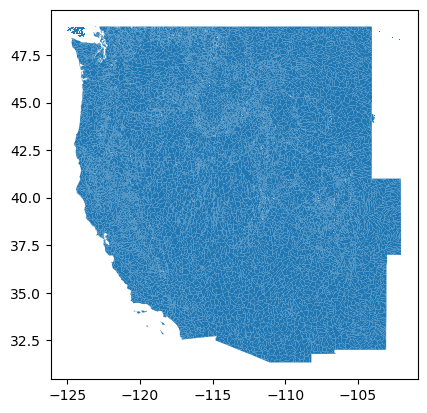

In [112]:
huc10_snow.plot()

<Axes: >

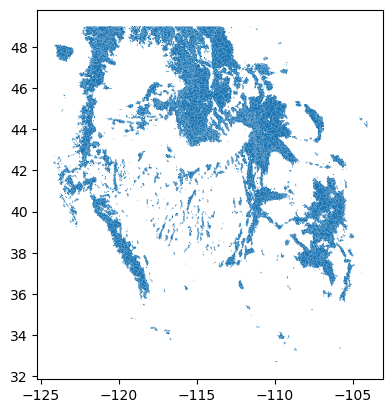

In [111]:
huc10_snow.dropna().plot()

In [113]:
huc10_snow = huc10_snow.dropna()

<Axes: >

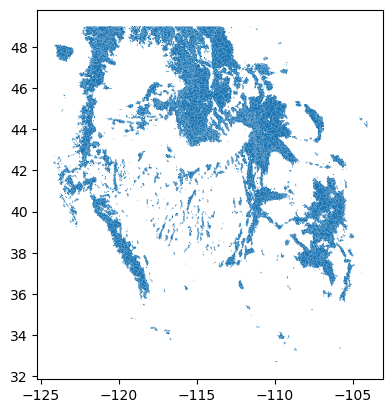

In [114]:
huc10_snow.plot()

In [119]:
huc10_snow.to_file('../data/huc10_100_snow.geojson',driver='GeoJSON')

<Axes: title={'center': 'spatial_ref = 0'}, xlabel='x', ylabel='y'>

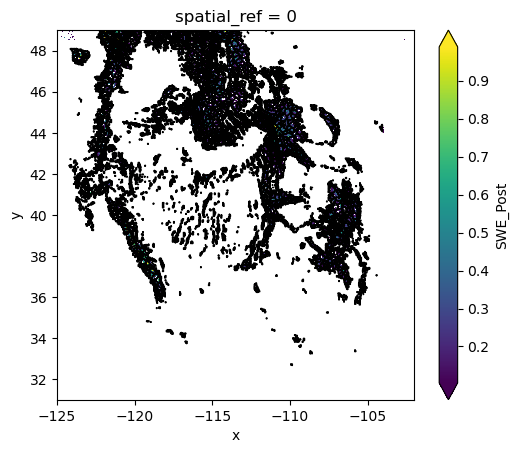

In [116]:
fig, ax = plt.subplots()
mean_swe.plot(ax=ax,robust=True)
huc10_snow.plot(ax=ax, facecolor='none', edgecolor='k')

<Axes: >

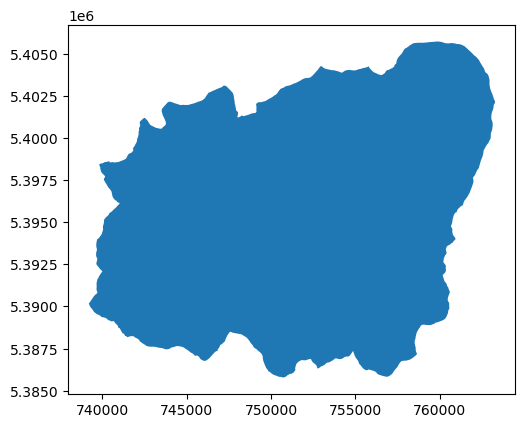

In [90]:
huc10_sim_proj[0:1].plot()

<Axes: >

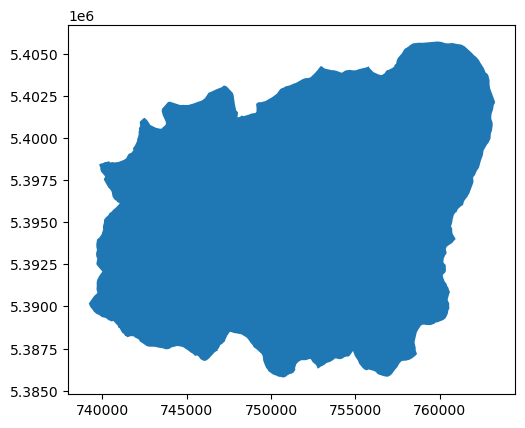

In [91]:
huc10_sim_proj_10[0:1].plot()

<Axes: >

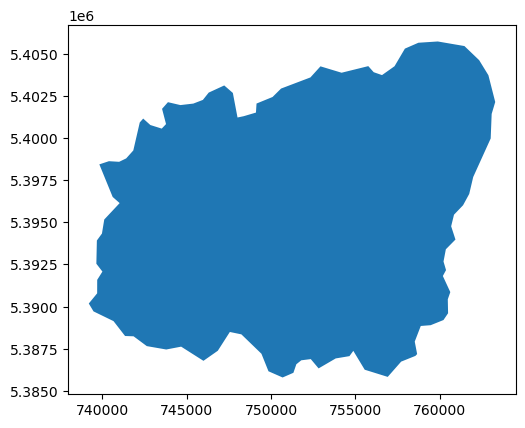

In [92]:
huc10_sim_proj_100[0:1].plot()

<Axes: >

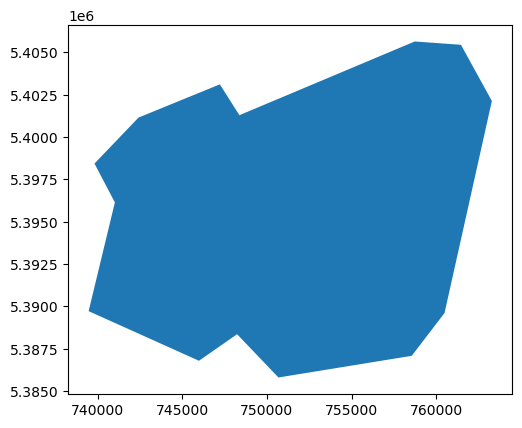

In [93]:
huc10_sim_proj_1000[0:1].plot()

In [80]:
n_vertices=[] ###

for i, row in huc10_sim_proj_100.iterrows():
    # It's better to check if multigeometry
    multi = row.geometry.type.startswith("Multi")

    if multi:
        n = 0
        # iterate over all parts of multigeometry
        for part in row.geoms:
            n += len(part.exterior.coords)
    else:
        n = len(row.geometry.exterior.coords)
    n_vertices.append(n) ###


huc10_sim_proj_100["n_vertices"] = n_vertices ###

/var/folders/yr/1f67jccn6hl_lyxnqy7qjpq40000gp/T/ipykernel_1119/3665743219.py:5: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  multi = row.geometry.type.startswith("Multi")


type: 'Series' object has no attribute 'geoms'

In [29]:
huc10['GEO_ID']

0       0400000US04
1       0400000US04
2       0400000US04
3       0400000US04
4       0400000US04
           ...     
6067    0400000US04
6068    0400000US04
6069    0400000US04
6070    0400000US04
6071    0400000US04
Name: GEO_ID, Length: 6072, dtype: object

In [28]:
huc10['ObjectID']

0         34
1         35
2         36
3         37
4         38
        ... 
6067    1005
6068    1006
6069    1007
6070    1008
6071    1009
Name: ObjectID, Length: 6072, dtype: int64

In [13]:
huc10['tnmid']

0       {7920C658-F284-420B-9DDB-AF698DB7638D}
1       {77EF4627-18F4-4B8B-A662-5A0EAECCBF20}
2       {F0499B78-C0AF-4552-8BA4-DFB2F061BC3A}
3       {8408FE47-5F2E-44C2-8A32-1C1B99FF5FD4}
4       {4B09C9D6-5A1F-4823-8F13-EB717D93C8E1}
                         ...                  
6067    {210EDA18-9564-4735-87AD-760B7228AC1D}
6068    {59B1ADBF-F7F8-4DBC-8636-65825F86E7C5}
6069    {17BE2B7D-6D95-4F03-B91A-13334DF7BDC0}
6070    {539FC429-B0A8-4BDF-A70A-02E0D85F28BF}
6071    {D53AE540-18E3-4D4A-B7F4-FCD8BAF00138}
Name: tnmid, Length: 6072, dtype: object

In [14]:
huc10['metasource']

0       {4C5B3544-0506-4F68-9052-0EA609999DCC}
1       {4C5B3544-0506-4F68-9052-0EA609999DCC}
2       {4C5B3544-0506-4F68-9052-0EA609999DCC}
3       {4C5B3544-0506-4F68-9052-0EA609999DCC}
4       {4C5B3544-0506-4F68-9052-0EA609999DCC}
                         ...                  
6067    {C39E5C8A-0E2E-49C8-AAF0-78501837949B}
6068    {C39E5C8A-0E2E-49C8-AAF0-78501837949B}
6069    {FE4AD22E-A115-40E4-9EC7-8497E5725E31}
6070    {FE4AD22E-A115-40E4-9EC7-8497E5725E31}
6071    {1FF46025-874C-4D4B-BD40-702A6B62DC21}
Name: metasource, Length: 6072, dtype: object

In [15]:
huc10['sourcedata']

0                                                     NaN
1                                                     NaN
2                                                     NaN
3                                                     NaN
4                                                     NaN
                              ...                        
6067                 Marin County, California - QL1 LiDAR
6068                 Marin County, California - QL1 LiDAR
6069                 QL1 Lidar collected 12/22/18-3/15/19
6070                 QL1 Lidar collected 12/22/18-3/15/19
6071    3D Elevation Product 1/3 Arc-second 1 x 1 degr...
Name: sourcedata, Length: 6072, dtype: object

In [16]:
huc10['sourceorig']

0                                                     NaN
1                                                     NaN
2                                                     NaN
3                                                     NaN
4                                                     NaN
                              ...                        
6067                               U.S. Geological Survey
6068                               U.S. Geological Survey
6069    Natural Resources and Conservation Service and...
6070    Natural Resources and Conservation Service and...
6071                               U.S. Geological Survey
Name: sourceorig, Length: 6072, dtype: object

In [17]:
huc10['sourcefeat']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
6067   NaN
6068   NaN
6069   NaN
6070   NaN
6071   NaN
Name: sourcefeat, Length: 6072, dtype: float64

In [18]:
huc10['loaddate']

0       2017-03-11
1       2017-03-11
2       2017-03-11
3       2017-03-11
4       2017-03-11
           ...    
6067    2022-03-07
6068    2022-03-07
6069    2022-03-15
6070    2022-03-15
6071    2022-03-16
Name: loaddate, Length: 6072, dtype: object

In [19]:
huc10['referenceg']

0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
            ...      
6067              NaN
6068    236440,254638
6069           254865
6070    217942,247074
6071              NaN
Name: referenceg, Length: 6072, dtype: object

In [20]:
huc10['areaacres']

0        83178.31
1        64585.33
2        67739.49
3        43192.75
4        57367.75
          ...    
6067     94498.26
6068    102667.76
6069     68509.90
6070     68537.50
6071    162783.59
Name: areaacres, Length: 6072, dtype: float64

In [21]:
huc10['states']

0          MT
1          MT
2       CN,MT
3       CN,MT
4       CN,MT
        ...  
6067       CA
6068       CA
6069       CA
6070       CA
6071       CA
Name: states, Length: 6072, dtype: object

In [22]:
huc10['huc10']

0       0904000101
1       0904000102
2       0904000201
3       0904000103
4       0904000107
           ...    
6067    1801011009
6068    1805000503
6069    1805000501
6070    1805000504
6071    1801011007
Name: huc10, Length: 6072, dtype: object

In [23]:
huc10['name']

0                Headwaters Saint Mary River
1                         Swiftcurrent Creek
2                     Headwaters Belly River
3                             Boundary Creek
4                    Middle Saint Mary River
                        ...                 
6067                     Lower Russian River
6068                  Tomales Bay-Bodega Bay
6069                         Lagunitas Creek
6070    Abbotts Lagoon-Frontal Pacific Ocean
6071                         Mark West Creek
Name: name, Length: 6072, dtype: object

In [24]:
huc10['hutype']

0       S
1       S
2       M
3       S
4       S
       ..
6067    S
6068    S
6069    S
6070    F
6071    S
Name: hutype, Length: 6072, dtype: object

In [25]:
huc10['humod']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
6067    NaN
6068     NM
6069     RS
6070     NM
6071    NaN
Name: humod, Length: 6072, dtype: object

In [27]:
huc10['shape_Area']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
6067   NaN
6068   NaN
6069   NaN
6070   NaN
6071   NaN
Name: shape_Area, Length: 6072, dtype: float64

<Axes: >

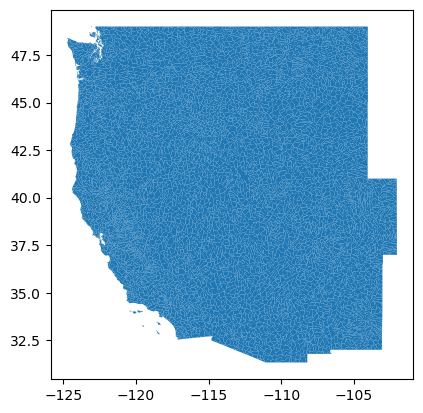

In [5]:
huc10.plot()

In [9]:
!gdalinfo ../data/huc10.geojson

ERROR 4: `../data/huc10.geojson' not recognized as a supported file format.
gdalinfo failed - unable to open '../data/huc10.geojson'.


In [11]:
huc10.shape

(6072, 24)